# **Breast Cancer Diagnosis via Logistic Regression**

Loading & Visualizing data

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing

In [2]:
names = ['id','thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit','class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' +
                 'breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                names=names,na_values='?',header=None)
df = df.dropna()
df.head(6)

,id,thick,size_unif,shape_unif,marg,cell_size,bare,chrom,normal,mit,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4


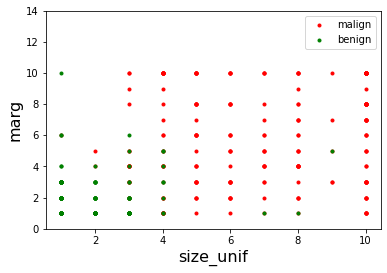

In [3]:
yraw = np.array(df['class'])
BEN_VAL = 2   
MAL_VAL = 4   
y = (yraw == MAL_VAL).astype(int)
Iben = (y==0)
Imal = (y==1)

xnames =['size_unif','marg'] 
X = np.array(df[xnames])

plt.plot(X[Imal,0],X[Imal,1],'r.')
plt.plot(X[Iben,0],X[Iben,1],'g.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
plt.ylim(0,14)
plt.legend(['malign','benign'],loc='upper right')

Improving on the above plot

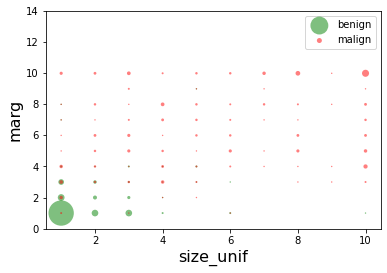

In [4]:
def plot_cnt(X,y,legend=True):
    
    x0val = np.array(list(set(X[:,0]))).astype(float)
    x1val = np.array(list(set(X[:,1]))).astype(float)
    x0, x1 = np.meshgrid(x0val,x1val)
    x0e= np.hstack((x0val,np.max(x0val)+1))
    x1e= np.hstack((x1val,np.max(x1val)+1))

    yval = list(set(y))
    color = ['g','r']
    for i in range(len(yval)):
        I = np.where(y==yval[i])[0]
        cnt, x0e, x1e = np.histogram2d(X[I,0],X[I,1],[x0e,x1e])
        x0, x1 = np.meshgrid(x0val,x1val)
        plt.scatter(x0.ravel(), x1.ravel(), s=2*cnt.ravel(),alpha=0.5,
                    c=color[i],edgecolors='none')
    if legend:
        plt.ylim([0,14])
        plt.legend(['benign','malign'], loc='upper right')
        plt.xlabel(xnames[0], fontsize=16)
        plt.ylabel(xnames[1], fontsize=16)   
        
plot_cnt(X,y)

Some Simple Classification Ideas

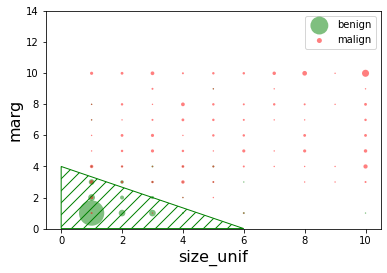

In [6]:
from matplotlib import patches
plot_cnt(X,y)

ax = plt.gca() 
ax.add_patch(
    patches.Polygon([[0,0],[0,4],[6,0]],
        color='green',
        fill=False, hatch = '//'
    )
)

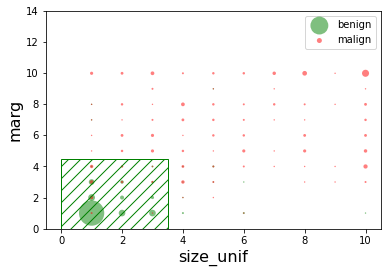

In [7]:
plot_cnt(X,y)
ax = plt.gca()
ax.add_patch(
    patches.Rectangle(
        (0, 0),   # (x,y)
        width=3.5, height=4.5,  color='green',
        fill=False, hatch = '//'
    )
)

**Logistic Functions**

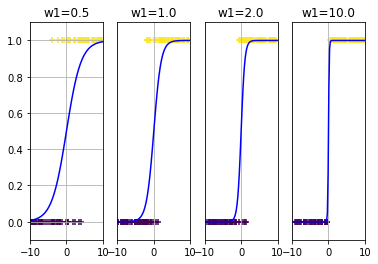

In [8]:
nx = 100
xm = 10
w1s = np.array([0.5,1,2,10])
nplot = w1s.size
iplot = 0
for w1 in w1s:
    iplot += 1
    x  = np.random.uniform(-xm,xm,nx)
    plt.subplot(1,nplot,iplot)
    py = 1/(1+np.exp(-w1*x))
    yp = np.array(np.random.rand(nx) < py)
    xp = np.linspace(-xm,xm,100)
    pyp = 1/(1+np.exp(-w1*xp))

    plt.scatter(x,yp,c=yp,edgecolors='none',marker='+')
    plt.plot(xp,pyp,'b-')
    plt.axis([-xm,xm,-0.1,1.1])
    plt.grid()
    if (iplot > 1):
        plt.yticks([])
    plt.xticks([-10,0,10])
    plt.title('w1={0:.1f}'.format(w1))

**Fitting Logistic Model on Two Variables**

In [9]:
xnames =['size_unif','marg'] 
X = np.array(df[xnames])
print(X.shape)

(683, 2)


In [10]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.30)

from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
Xtr1 = scal.fit_transform(Xtr)
Xts1 = scal.transform(Xts)

Fitting data using sklearn package. Parameter C is the level of regularization, wherein higher values mean less regularization

In [11]:
reg = linear_model.LogisticRegression(C=1e5)
reg.fit(Xtr1, ytr)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Measuring Accuracy of the model using test data

In [12]:
yhat = reg.predict(Xts1)
acc = np.mean(yhat == yts)
print("Accuracy on test data = %f" % acc)

Accuracy on test data = 0.907317


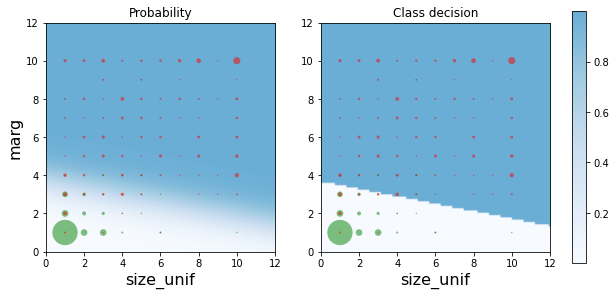

In [13]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

blue_map = cm.get_cmap('Blues')
light_map = ListedColormap(blue_map(np.linspace(0,0.5,100)))

# Create grid of points to plot the data
xmin = np.array([0,0])
xmax = np.array([12,12])
nplot = 100
xp0 = np.linspace(xmin[0], xmax[0], nplot)
xp1 = np.linspace(xmin[1], xmax[1], nplot)
Xp0, Xp1 = np.meshgrid(xp0,xp1)
Xplot = np.column_stack((Xp0.ravel(), Xp1.ravel()))
Zplot = scal.transform(Xplot)


prob = reg.predict_proba(Zplot)[:,1]
prob_mat = np.fliplr(prob.reshape((nplot, nplot))).T

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
im = plt.imshow(prob_mat, extent=[xmin[0],xmax[0],xmin[1],xmax[1]], cmap=light_map)
plot_cnt(X,y, legend=False)
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
plt.title('Probability')

plt.subplot(1,2,2)
yhat = (prob_mat > 0.5).astype(float)
plt.imshow(yhat, extent=[xmin[0],xmax[0],xmin[1],xmax[1]], cmap=light_map)
plot_cnt(X,y, legend=False)
plt.xlabel(xnames[0], fontsize=16)
plt.title('Class decision')


plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8) 
cb_ax = plt.gcf().add_axes([0.83, 0.15, 0.02, 0.7])
plt.colorbar(im, cax=cb_ax)

**Fitting the model on all variables**

In [14]:
xnames = names[1:-1]
X = np.array(df[xnames])
print(X.shape)

# Split into training and test
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.30)

(683, 9)


In [15]:
scal = StandardScaler()
Xtr1 = scal.fit_transform(Xtr)
Xts1 = scal.transform(Xts)

# Fit on the scaled trained data
reg = linear_model.LogisticRegression(C=1e5)
reg.fit(Xtr1, ytr)

# Measure accuracy
yhat = reg.predict(Xts1)
acc = np.mean(yhat == yts)
print("Accuracy on test data = %f" % acc)

Accuracy on test data = 0.985366


In [16]:
W=reg.coef_
data = {'feature': xnames, 'slope': np.squeeze(W)}
dfslope = pd.DataFrame(data=data)
dfslope

,feature,slope
0,thick,1.454283
1,size_unif,0.077335
2,shape_unif,0.965218
3,marg,0.911426
4,cell_size,0.247079
5,bare,1.741696
6,chrom,0.690862
7,normal,0.694854
8,mit,1.038358


**Cross Validation**

In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
nfold = 10
kf = KFold(n_splits=nfold)
acc = np.zeros(nfold)
prec = np.zeros(nfold)
rec = np.zeros(nfold)
f1 = np.zeros(nfold)

for i, I in enumerate(kf.split(X)):
    
    # Get training and test data
    train, test = I
    Xtr = X[train,:]
    ytr = y[train]
    Xts = X[test,:]
    yts = y[test]
    
    # Scale the data
    scal = StandardScaler()
    Xtr1 = scal.fit_transform(Xtr)
    Xts1 = scal.transform(Xts)    
    
    # Fit a model    
    reg.fit(Xtr1, ytr)
    
    # Predict on test samples and measure accuracy
    yhat = reg.predict(Xts1)
    acc[i] = np.mean(yhat == yts)
    
    # Measure other performance metrics
    prec[i],rec[i],f1[i],_  = precision_recall_fscore_support(yts,yhat,average='binary') 

precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)

# Compute the standard errors
prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)
acc_se = np.std(acc)/np.sqrt(nfold-1)

print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se))
print('Recall =    {0:.4f}, SE={1:.4f}'.format(recm, rec_se))
print('f1 =        {0:.4f}, SE={1:.4f}'.format(f1m, f1_se))
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

Precision = 0.9610, SE=0.0118
Recall =    0.9615, SE=0.0144
f1 =        0.9608, SE=0.0112
Accuracy =  0.9679, SE=0.0110


**Plotting the ROC curve**

(0.0, 0.1)

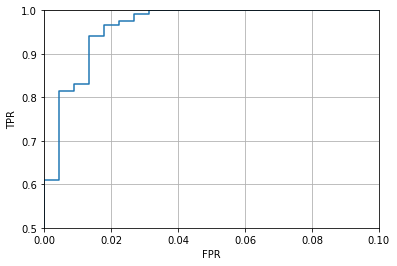

In [18]:
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.50)


# Scale the data
scal = StandardScaler()
Xtr1 = scal.fit_transform(Xtr)
Xts1 = scal.transform(Xts)

# Fit on the scaled trained data
reg = linear_model.LogisticRegression(C=1e5)
reg.fit(Xtr1, ytr)

# Predict probability on the test data
yprob = reg.predict_proba(Xts1)

# Compute FPR and TPR
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(yts,yprob[:,1])

plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.5,1])
plt.xlim([0,0.1])

Relation between threshold and the TPR and FPR

(0.0, 1.0)

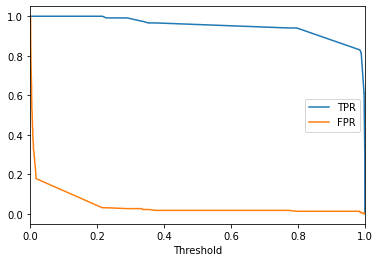

In [19]:
plt.plot(thresholds,tpr, thresholds,fpr)
plt.legend(['TPR','FPR'])
plt.xlabel('Threshold')
plt.xlim([0,1])

Measuring goodness of the classification method

In [20]:
auc=metrics.roc_auc_score(yts,yprob[:,1])
print("AUC=%f" % auc)

AUC=0.996103
